# Regression problem on auto.csv dataset

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler,MaxAbsScaler,QuantileTransformer,RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
import xgboost

In [2]:
dataset = pd.read_csv('D:/Bootcamp ML - Mada/regression dataset/auto.csv')

dataset.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [3]:
dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16   engine-size       205 non

## Data Cleaning
Replacing '?' object to nan

In [5]:
# data cleaning

#replace "?""

dataset.replace("?", np.nan, inplace=True)
dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Checking nan values from features

In [6]:
dataset.isnull().sum().sort_values()

symboling             0
city-mpg              0
compression-ratio     0
fuel-system           0
 engine-size          0
num-of-cylinders      0
engine-type           0
curb-weight           0
highway-mpg           0
width                 0
height                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
aspiration            0
fuel-type             0
make                  0
length                0
num-of-doors          2
horsepower            2
peak-rpm              2
bore                  4
stroke                4
price                 4
normalized-losses    41
dtype: int64

## Count Mean value from features that have some 'nan' values

In [7]:
#Mencari nilai mean dari beberapa kolom
avg_norm_loss = dataset['normalized-losses'].astype('float').mean(axis=0)
avg_stroke = dataset['stroke'].astype('float').mean(axis=0)
avg_bore = dataset['bore'].astype('float').mean(axis=0)
avg_horsepower = dataset['horsepower'].astype('float').mean(axis=0)
avg_rpm = dataset['peak-rpm'].astype('float').mean(axis=0)


## Replacing the 'nan' values with the Mean

In [8]:
#Mengganti nilai Nan dengan mean
dataset['normalized-losses'].replace(np.nan, avg_norm_loss, inplace=True)
dataset['stroke'].replace(np.nan, avg_stroke, inplace=True)
dataset['bore'].replace(np.nan, avg_bore, inplace=True)
dataset['horsepower'].replace(np.nan, avg_horsepower, inplace=True)
dataset['peak-rpm'].replace(np.nan, avg_rpm, inplace=True)


In [9]:
dataset.isnull().sum().sort_values()

symboling            0
city-mpg             0
peak-rpm             0
horsepower           0
compression-ratio    0
stroke               0
bore                 0
fuel-system          0
 engine-size         0
num-of-cylinders     0
engine-type          0
curb-weight          0
height               0
width                0
length               0
wheel-base           0
engine-location      0
drive-wheels         0
body-style           0
aspiration           0
fuel-type            0
make                 0
normalized-losses    0
highway-mpg          0
num-of-doors         2
price                4
dtype: int64

## Checking data distribution from 'num-of-doors' feature

In [10]:
# cleaning num of doors and price

dataset['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

## Changing the 'nan' value from 'num-of-doors' feature with the majority value

In [ ]:
#Mengubah nilai nan dari kolom 'num-of-doors' menjadi nilai mayoritas yaitu 4
dataset['num-of-doors'].replace(np.nan, "four", inplace=True)

## Droping the 'nan' values from 'price' feature

In [12]:
#Menghapus nilai nan pada 'kolom' price
dataset.dropna(subset=["price"], axis=0, inplace = True)

In [13]:
dataset.isnull().sum().sort_values()

symboling            0
city-mpg             0
peak-rpm             0
horsepower           0
compression-ratio    0
stroke               0
bore                 0
fuel-system          0
 engine-size         0
num-of-cylinders     0
engine-type          0
curb-weight          0
height               0
width                0
length               0
wheel-base           0
engine-location      0
drive-wheels         0
body-style           0
num-of-doors         0
aspiration           0
fuel-type            0
make                 0
normalized-losses    0
highway-mpg          0
price                0
dtype: int64

## Casting data type from 'object' to float or integer on some features

In [14]:
#Mengubah type data dari beberapa kolom
dataset[["bore", "stroke", "price", "peak-rpm"]] = dataset[["bore", "stroke", "price", "peak-rpm"]].astype('float')
dataset[["horsepower", "normalized-losses"]] = dataset[["horsepower", "normalized-losses"]].astype('int')


## Show the Histogram

array([[<AxesSubplot:title={'center':'normalized-losses'}>,
        <AxesSubplot:title={'center':'wheel-base'}>,
        <AxesSubplot:title={'center':'length'}>],
       [<AxesSubplot:title={'center':'width'}>,
        <AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'bore'}>],
       [<AxesSubplot:title={'center':'stroke'}>,
        <AxesSubplot:title={'center':'compression-ratio'}>,
        <AxesSubplot:title={'center':'horsepower'}>],
       [<AxesSubplot:title={'center':'peak-rpm'}>,
        <AxesSubplot:title={'center':'price'}>, <AxesSubplot:>]],
      dtype=object)

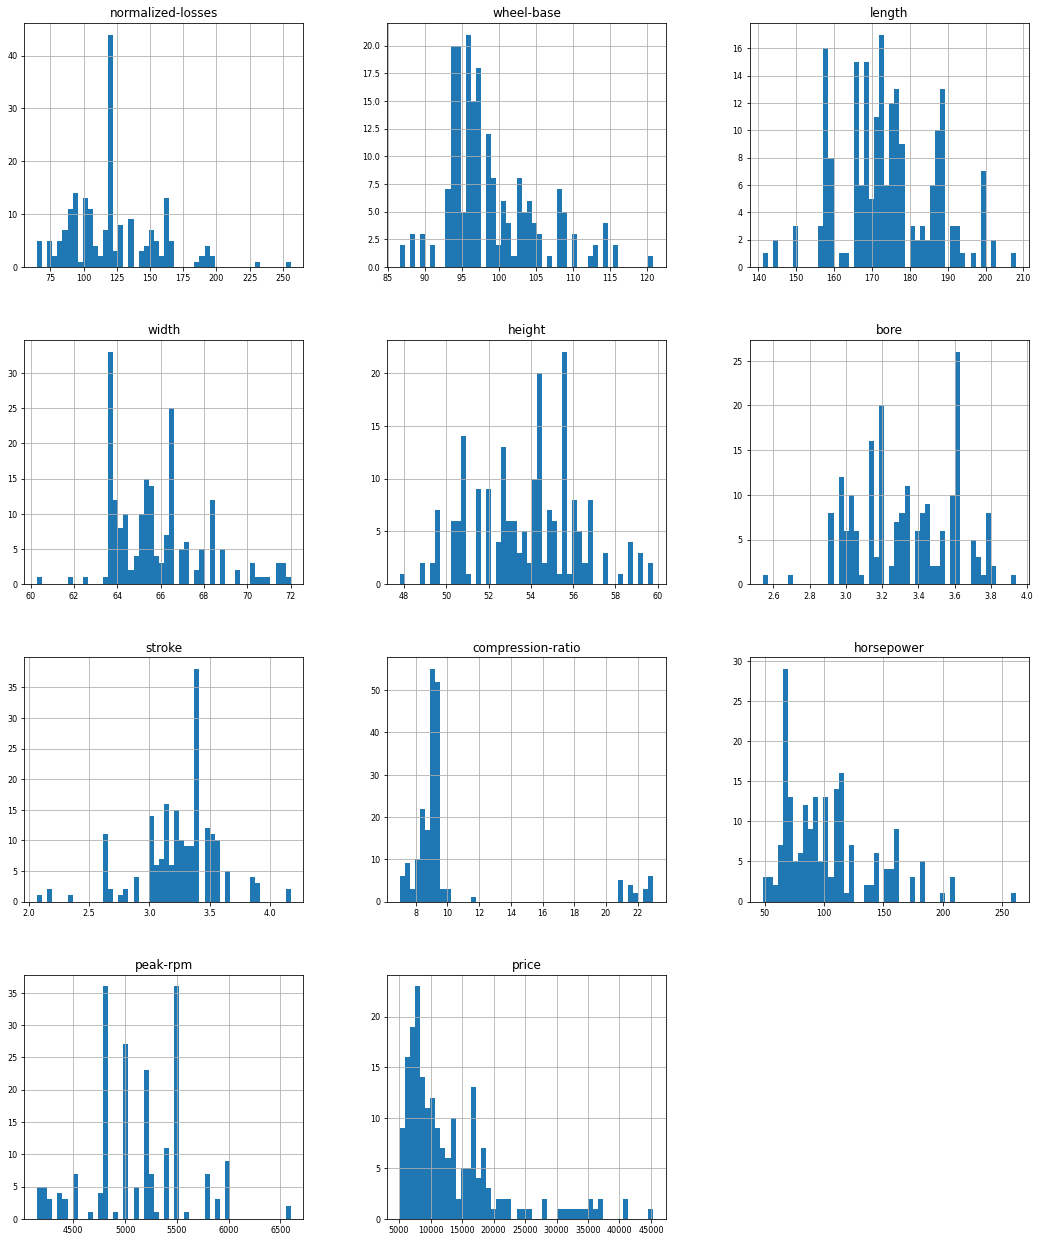

In [15]:
dataset_numbers = dataset.select_dtypes(include=['float', 'int'])

dataset_numbers.hist(figsize=(18,22), bins=50, xlabelsize=8, ylabelsize=8)

In [16]:
dataset.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
 engine-size           int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [17]:
dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


## One-hot Encoding to some features that had class-type data in it

In [18]:
# one hot encoding

fuel_categ = pd.get_dummies(dataset['fuel-type'])
dataset = pd.concat([dataset, fuel_categ],axis=1)

make_categ = pd.get_dummies(dataset['make'])
dataset = pd.concat([dataset, make_categ],axis=1)

aspiration_categ = pd.get_dummies(dataset['aspiration'])
dataset = pd.concat([dataset, aspiration_categ],axis=1)

body_categ = pd.get_dummies(dataset['body-style'])
dataset = pd.concat([dataset, body_categ],axis=1)

wheels_categ = pd.get_dummies(dataset['drive-wheels'])
dataset = pd.concat([dataset, wheels_categ],axis=1)

engine_location = pd.get_dummies(dataset['engine-location'])
dataset = pd.concat([dataset, engine_location],axis=1)

engine_type = pd.get_dummies(dataset['engine-type'])
dataset = pd.concat([dataset, engine_type],axis=1)

fuel_system = pd.get_dummies(dataset['fuel-system'])
dataset = pd.concat([dataset, engine_type],axis=1)

## Changing string-type data to integer in 'num-of-doors' and 'num-of-cylinders' 

In [19]:
# clean up doors
# Mengubah nilai 'string' menjadi int
cleanup_doors = {
    'num-of-doors': {
        'four' : 4,
        'two' : 2
    },
    'num-of-cylinders': {
        'four' : 4,
        'two' : 2,
        'three' : 3,
        'five' : 5,
        'six' : 6,
        'eight' : 8,
        'twelve' : 12
    }
}

dataset.replace(cleanup_doors, inplace=True)

In [20]:
dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,ohc,ohcf,ohcv,rotor,dohc,l,ohc,ohcf,ohcv,rotor
0,3,122,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,0,0,0,0,1,0,0,0,0,0
1,3,122,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,0,0,0,0,1,0,0,0,0,0
2,1,122,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,0,0,1,0,0,0,0,0,1,0
3,2,164,audi,gas,std,4,sedan,fwd,front,99.8,...,1,0,0,0,0,0,1,0,0,0
4,2,164,audi,gas,std,4,sedan,4wd,front,99.4,...,1,0,0,0,0,0,1,0,0,0


## Droping some features that have been change before

In [21]:
#Menghapus kolom yang sudah tidak digunakan
dataset.drop(['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system' ], axis=1,inplace=True)

In [22]:
dataset.head()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,...,ohc,ohcf,ohcv,rotor,dohc,l,ohc,ohcf,ohcv,rotor
0,3,122,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,1,0,0,0,0,0
1,3,122,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,1,0,0,0,0,0
2,1,122,2,94.5,171.2,65.5,52.4,2823,6,152,...,0,0,1,0,0,0,0,0,1,0
3,2,164,4,99.8,176.6,66.2,54.3,2337,4,109,...,1,0,0,0,0,0,1,0,0,0
4,2,164,4,99.4,176.6,66.4,54.3,2824,5,136,...,1,0,0,0,0,0,1,0,0,0


In [23]:
dataset.describe()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,...,ohc,ohcf,ohcv,rotor,dohc,l,ohc,ohcf,ohcv,rotor
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,3.144279,98.797015,174.200995,65.889055,53.766667,2555.666667,4.363184,126.875622,...,0.721393,0.074627,0.064677,0.019900,0.059701,0.059701,0.721393,0.074627,0.064677,0.019900
std,1.254802,31.99625,0.992008,6.066366,12.322175,2.101471,2.447822,517.296727,1.059452,41.546834,...,0.449433,0.263444,0.246568,0.140007,0.237525,0.237525,0.449433,0.263444,0.246568,0.140007
min,-2.000000,65.00000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,2.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,4.000000,98.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,122.00000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,137.00000,4.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,4.000000,141.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,3.000000,256.00000,4.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,12.000000,326.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
print(dataset.dtypes)

symboling              int64
normalized-losses      int32
num-of-doors           int64
wheel-base           float64
length               float64
                      ...   
l                      uint8
ohc                    uint8
ohcf                   uint8
ohcv                   uint8
rotor                  uint8
Length: 66, dtype: object


## Correlation matrix of the features

In [25]:
correlation_matrix = dataset.corr()
corr = correlation_matrix['price'].sort_values(ascending=False)
correlation_dataframe = pd.DataFrame({'column': corr.index,
                 'Correlation with medv': corr.values})
correlation_dataframe

,column,Correlation with medv
0,price,1.000000
1,engine-size,0.872335
2,curb-weight,0.834415
3,horsepower,0.809607
4,width,0.751265
...,...,...
61,ohc,-0.332851
62,ohc,-0.332851
63,fwd,-0.595979
64,city-mpg,-0.686571


## Feature Engineering using various Scaller algorithm

In [26]:
label = dataset['price'] #--> Target Prediksi
feature_used = dataset.drop(['price',],axis=1) #--> Fitur yang digunakan adalah selain fitur 'quality'

# Scalling Data
scaler_1 = StandardScaler(with_mean=True,with_std=True,copy=True)
scaler_2 = PowerTransformer(method='yeo-johnson', standardize=True)
scaler_3 = PowerTransformer(method='box-cox',standardize=True)
scaler_4 = QuantileTransformer(n_quantiles=100,output_distribution='uniform', random_state=304)
scaler_5 = MinMaxScaler(feature_range=(0,1),copy=True)
scaler_6 = MaxAbsScaler(copy=True)
scaler_7 = RobustScaler(with_centering=True,with_scaling=True,quantile_range=(25.0,75.0))

x_1 = scaler_1.fit_transform(feature_used.values)
y_1 = scaler_1.fit_transform(label.values.reshape(-1,1)).flatten()

x_2 = scaler_2.fit_transform(feature_used.values)
y_2 = scaler_2.fit_transform(label.values.reshape(-1,1)).flatten()

#x_3 = scaler_3.fit_transform(feature_used.values) ---> BOX-COX tidak digunakan karena pada data terdapat nilai 0
#y_3 = scaler_3.fit_transform(label.values.reshape(-1,1)).flatten()

x_4 = scaler_4.fit_transform(feature_used.values)
y_4 = scaler_4.fit_transform(label.values.reshape(-1,1)).flatten()

x_5 = scaler_5.fit_transform(feature_used.values)
y_5 = scaler_5.fit_transform(label.values.reshape(-1,1)).flatten()

x_6 = scaler_6.fit_transform(feature_used.values)
y_6 = scaler_6.fit_transform(label.values.reshape(-1,1)).flatten()

x_7 = scaler_7.fit_transform(feature_used.values)
y_7 = scaler_7.fit_transform(label.values.reshape(-1,1)).flatten()


In [27]:
def scores(test,prediction):
    print("skor r2 : {:.3f}".format(r2_score(test,prediction)))
    print("skor mse : {:.3f}".format(mean_squared_error(test,prediction)))
    print("skor mea : {:.3f}".format(mean_absolute_error(test,prediction)))
    print("skor RMSE : {:.3f}".format(np.sqrt(mean_squared_error(test,prediction))))

[0.96891118 0.92063538 0.85283167 0.77462084 0.64294838 0.93346561
 0.89431384 0.84739515 0.79380376 0.88366151]
skor r2 : 0.802
skor mse : 0.134
skor mea : 0.247
skor RMSE : 0.366


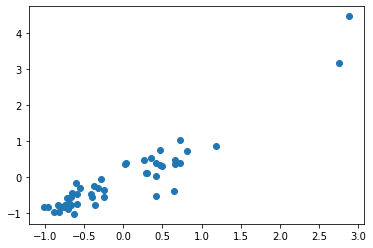

In [36]:
# Menggunakan Standard Scaler
feature_train, feature_test, label_train, label_test = train_test_split(x_1, y_1, test_size = 0.25, random_state=10)
linear_reg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
linear_reg.fit(feature_train,label_train)
cross_val = cross_val_score(linear_reg, feature_train, label_train, cv=10)
print(cross_val)
predictions = linear_reg.predict(feature_test)
scores(label_test,predictions)
plt.scatter(label_test,predictions)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
skor r2 : 1.000
skor mse : 0.000
skor mea : 0.000
skor RMSE : 0.000


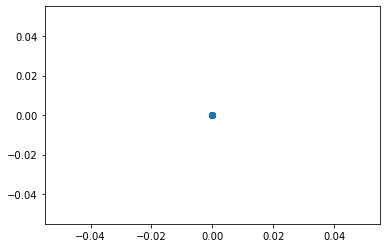

In [29]:
# Menggunakan Power Transform 'yeo-jhonson'
feature_train, feature_test, label_train, label_test = train_test_split(x_2, y_2, test_size = 0.25, random_state=10)
linear_reg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
linear_reg.fit(feature_train,label_train)
cross_val = cross_val_score(linear_reg, feature_train, label_train, cv=10)
print(cross_val)
predictions = linear_reg.predict(feature_test)
scores(label_test,predictions)
plt.scatter(label_test,predictions)

[0.8967807  0.88959342 0.93485887 0.90712562 0.92666723 0.96604349
 0.78877087 0.92627336 0.88895884 0.87774426]
skor r2 : 0.883
skor mse : 0.009
skor mea : 0.070
skor RMSE : 0.097


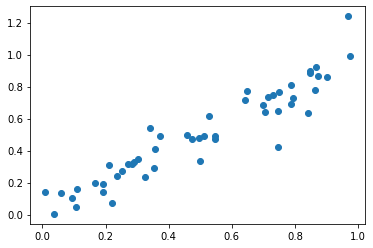

In [30]:
# Menggunakan Quantile Transform 
feature_train, feature_test, label_train, label_test = train_test_split(x_4, y_4, test_size = 0.25, random_state=10)
linear_reg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
linear_reg.fit(feature_train,label_train)
cross_val = cross_val_score(linear_reg, feature_train, label_train, cv=10)
print(cross_val)
predictions = linear_reg.predict(feature_test)
scores(label_test,predictions)
plt.scatter(label_test,predictions)

[0.96891118 0.91661576 0.85620911 0.77462084 0.65164028 0.93346561
 0.89431384 0.87071975 0.79456121 0.88239512]
skor r2 : 0.802
skor mse : 0.005
skor mea : 0.049
skor RMSE : 0.072


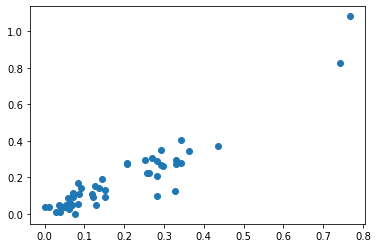

In [31]:
# Menggunakan min-max Transform 
feature_train, feature_test, label_train, label_test = train_test_split(x_5, y_5, test_size = 0.25, random_state=10)
linear_reg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
linear_reg.fit(feature_train,label_train)
cross_val = cross_val_score(linear_reg, feature_train,label_train, cv=10)
print(cross_val)
predictions = linear_reg.predict(feature_test)
scores(label_test,predictions)
plt.scatter(label_test,predictions)

[0.96891118 0.92063538 0.85620911 0.77462084 0.65164028 0.93346561
 0.89431384 0.87071975 0.79456121 0.88239512]
skor r2 : 0.802
skor mse : 0.004
skor mea : 0.043
skor RMSE : 0.064


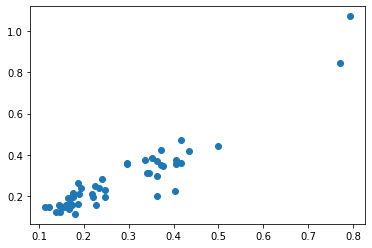

In [32]:
# Menggunakan max absolute scaller
feature_train, feature_test, label_train, label_test = train_test_split(x_6, y_6, test_size = 0.25, random_state=10)
linear_reg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
linear_reg.fit(feature_train,label_train)
cross_val = cross_val_score(linear_reg,feature_train,label_train, cv=10)
print(cross_val)              
predictions = linear_reg.predict(feature_test)
scores(label_test,predictions)
plt.scatter(label_test,predictions)

[0.96891118 0.92063538 0.85620911 0.77462084 0.65164028 0.93346561
 0.89431384 0.87071975 0.79456121 0.88239512]
skor r2 : 0.802
skor mse : 0.110
skor mea : 0.225
skor RMSE : 0.332


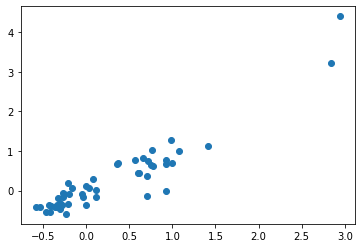

In [33]:
# Menggunakan robust scaller
feature_train, feature_test, label_train, label_test = train_test_split(x_7, y_7, test_size = 0.25, random_state=10)
linear_reg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
linear_reg.fit(feature_train,label_train)
cross_val = cross_val_score(linear_reg,feature_train,label_train, cv=10)
print(cross_val)
predictions = linear_reg.predict(feature_test)
scores(label_test,predictions)
plt.scatter(label_test,predictions)

# Random Forest Regressor

[0.95743911 0.97078338 0.83649626 0.93090889 0.7452143  0.8876383
 0.91713662 0.97246605 0.85251856 0.86228009]
skor r2 : 0.931
skor mse : 0.047
skor mea : 0.156
skor RMSE : 0.216


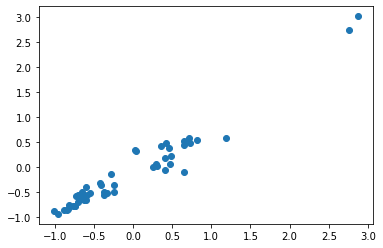

In [40]:
feature_train, feature_test, label_train, label_test = train_test_split(x_1, y_1, test_size = 0.25, random_state=10)
rfr = RandomForestRegressor(n_estimators=100,criterion='mse',max_features='auto')
rfr.fit(feature_train,label_train)
cross_val = cross_val_score(rfr,feature_train,label_train, cv=10)
print(cross_val)
predictions = rfr.predict(feature_test)
scores(label_test,predictions)
plt.scatter(label_test,predictions)

# XGBoost Regressor

[0.90308398 0.9388059  0.87809691 0.77811586 0.91272286 0.9348825
 0.94110449 0.87952449 0.86101859 0.93857494]
skor r2 : 0.912
skor mse : 0.007
skor mea : 0.064
skor RMSE : 0.083


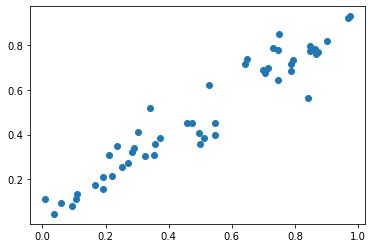

In [41]:
feature_train, feature_test, label_train, label_test = train_test_split(x_4, y_4, test_size = 0.25, random_state=10)
xgb = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

xgb.fit(feature_train,label_train)
cross_val = cross_val_score(xgb,feature_train,label_train, cv=10)
print(cross_val)
predictions = xgb.predict(feature_test)
scores(label_test,predictions)
plt.scatter(label_test,predictions)

# SVM

In [43]:
feature_train, feature_test, label_train, label_test = train_test_split(x_4, y_4, test_size = 0.25, random_state=10)
kernels =['poly','linear','rbf']
for index,value in enumerate(kernels):
    print("Menggunakan kernel "+str(value))
    svm = SVR(kernel=value)
    svm.fit(feature_train,label_train)
    cross_val = cross_val_score(svm,feature_train,label_train, cv=10)
    print(cross_val)
    predictions = svm.predict(feature_test)
    scores(label_test,predictions)
    print()

Menggunakan kernel poly
[0.89216592 0.87033684 0.84241008 0.69851599 0.8022799  0.88753853
 0.91687204 0.8864912  0.83781123 0.90593979]
skor r2 : 0.864
skor mse : 0.011
skor mea : 0.088
skor RMSE : 0.104

Menggunakan kernel linear
[0.88566363 0.84824572 0.87444312 0.83118672 0.83986197 0.96312241
 0.91535557 0.88447712 0.85376968 0.93386954]
skor r2 : 0.903
skor mse : 0.008
skor mea : 0.068
skor RMSE : 0.088

Menggunakan kernel rbf
[0.89933679 0.86617674 0.84960625 0.69344453 0.82918498 0.8893336
 0.90618369 0.87513987 0.87186595 0.89592874]
skor r2 : 0.883
skor mse : 0.009
skor mea : 0.085
skor RMSE : 0.096



In [44]:
feature_train, feature_test, label_train, label_test = train_test_split(x_4, y_4, test_size = 0.25, random_state=10)
numbers =16
for i in range(numbers):
    if i % 2 !=0:
        print("Menggunakan nilai k :"+str(i))
        knn = KNeighborsRegressor(n_neighbors=i,algorithm='auto',weights='distance')
        knn.fit(feature_train,label_train)
        cross_val = cross_val_score(knn,feature_train,label_train, cv=10)
        print(cross_val)
        predictions = knn.predict(feature_test)
        scores(label_test,predictions)
        print()

Menggunakan nilai k :1
[0.81828413 0.53048709 0.85544935 0.24819374 0.61901037 0.90570764
 0.78350697 0.72576938 0.49668539 0.8483237 ]
skor r2 : 0.773
skor mse : 0.018
skor mea : 0.103
skor RMSE : 0.134

Menggunakan nilai k :3
[0.77170963 0.73089737 0.86738401 0.49372263 0.73156834 0.81704055
 0.86206598 0.80382154 0.71207374 0.83177803]
skor r2 : 0.798
skor mse : 0.016
skor mea : 0.103
skor RMSE : 0.127

Menggunakan nilai k :5
[0.77771953 0.67921873 0.8653451  0.39669466 0.74335703 0.82550283
 0.86540306 0.84081409 0.76568987 0.84245791]
skor r2 : 0.786
skor mse : 0.017
skor mea : 0.107
skor RMSE : 0.130

Menggunakan nilai k :7
[0.84739466 0.69417838 0.87168071 0.31864735 0.70382774 0.84195246
 0.86224109 0.80593252 0.77120024 0.81893529]
skor r2 : 0.815
skor mse : 0.015
skor mea : 0.102
skor RMSE : 0.121

Menggunakan nilai k :9
[0.86093631 0.64627227 0.86544894 0.42318812 0.7337994  0.84938094
 0.88351387 0.85698099 0.80077912 0.77599133]
skor r2 : 0.825
skor mse : 0.014
skor mea : 